In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import AutomationModule as AM
from scipy.optimize import curve_fit
from natsort import natsorted
import matplotlib

font = {
        'weight' : 'bold',
        'size'   : 27}

matplotlib.rc('font', **font)
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
store_path = f"output/anderson/Plots_for_Report_20240613/T_t_analysis"
 #Save the plot in PDF format
if not os.path.exists(store_path):
      os.makedirs(store_path)
      print(f"Folder '{store_path}' created successfully.")

In [31]:
#slices = np.array([0.7,0.9])
slices = np.array([0,0.15,0.5,0.7,0.9])
#slices = np.array([1])
nu = 0.418
norm_factor = 4.1

In [32]:
Db = lambda l:3e2*l/3
a=5/3
#kl = 0.9458 #fitted value 
kl = 0.9358
z0 = 3.25*a


#Let's calculate  adjusted values
k =  2*np.pi*(nu/(a))

l_adjusted = kl/k
Db1 = Db(l_adjusted)
adjusted_xi = 6*l_adjusted*(k*l_adjusted)**2/(1-(k*l_adjusted)**4)

In [33]:
adjusted_xi/a

8.031197765242073

In [34]:
#store fluxes and max times for SAL regime 

max_times = []
fluxes_SAL = []
fluxes_Diff = []

for k,path_direction in enumerate( [
                       "RCP Sample 1 T_t slices nu 0.418/z_incidence",
                       #"RCP Sample 1 T_t slices nu 0.418 Res 30/z_incidence",
                       #"RCP Sample 1 Long Run With Monitors/z_incidence",
                       #"RCP Sample All Gap Range/z_incidence",
                       #"RCP Sample 1 T_t slices nu 0.45 Res 30/z_incidence",
                       #"RCP Sample 1 T_t slices nu 0.41 - 0.52 Res 30/z_incidence",
                       #"RCP Sample 1 T_t slices nu 0.41 - 0.52 Res 30/z_incidence"
                       #"RCP Sample 1 T_t nu 0.5 Res 30/z_incidence"
                       #"RCP Sample 1 T_t nu 0.42 Res 30/z_incidence"
                      
                       ]):

      folder_path = f"data/{path_direction}"

      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue
            
            
            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                print(structure_1.__str__())
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                flux_t = sim_data["time_monitorT"].flux
                flux_index = np.argmax(flux_t.values)
               
                x,y = flux_t['t'][:]*1e12,((flux_t[:]))

                item_flux = {
                        "flux":np.array(y),
                        "times":np.array(x),
                        "max_time":flux_t['t'][flux_index]*1e12,
                        "max_time_index":flux_index,
                        "size":slices[i]
                }
                if k==0:
                  
                  fluxes_SAL+=[item_flux]
                  if i==3:
                        flux_t0 = sim_data0["time_monitorT"].flux
                        x0,y0 = flux_t0['t'][:]*1e12,((flux_t0[:]/np.max(flux_t0)))
                        flux_index0 = np.argmax(flux_t0.values)
                        item_flux_0 = {
                          "flux":np.array(y0),
                          "times":np.array(x0),
                          "max_time":flux_t0['t'][flux_index0]*1e12,
                          "max_time_index":flux_index0,
                          "size":0
                          }
                        fluxes_SAL = [item_flux_0] + fluxes_SAL
                else:
                  
                  fluxes_Diff+=[item_flux]
                  if i==3:
                      flux_t0 = sim_data0["time_monitorT"].flux
                      x0,y0 = flux_t0['t'][:]*1e12,((flux_t0[:]/np.max(flux_t0)))
                      flux_index0 = np.argmax(flux_t0.values)
                      item_flux_0 = {
                        "flux":np.array(y0),
                        "times":np.array(x0),
                        "max_time":flux_t0['t'][flux_index0]*1e12,
                        "max_time_index":flux_index0,
                        "size":0
                        }
                      fluxes_Diff = [item_flux_0] + fluxes_Diff
                      
      
            

01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_4.5_runtime_7_lambdaRange_4.01-3.98_incidence_z.txt
Configured successfully.
output/data/RCP Sample 1 T_t slices nu 0.418/z_incidence\01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_4.5_runtime_7_lambdaRange_4.01-3.98_incidence_z.txt/Data
Simulation Parameters (wavelengths are expressed in um):
lambda_range: 3.98 - 4.01 um 
lambdaw (pulse) 2777.777777777858 
lambda0 3.992015968063872 
Runtime = 64.85968517742033 
resolution = 25.0 
time_per_fwidth = 7.000000000000001 
final decay value = 1.64e-11 

01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_9.01_runtime_7_lambdaRange_4.01-3.98_incidence_z.txt
Configured successfully.
output/data/RCP Sample 1 T_t slices nu 0.418/z_incidence\01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_9.01_runtime_7_lambdaRange_4.01-3.98_incidence_z.txt/Data
Simulation Parameters (wavelengths are expressed in um):
lambda_range: 3.98 - 4.01 um 
lambdaw (pulse) 

In [35]:
res = structure_1.resolution
time = structure_1.run_time

(5/3)/structure_1.monitor_lambdas

array([0.416  , 0.41675, 0.4175 , 0.41825, 0.419  ])

0


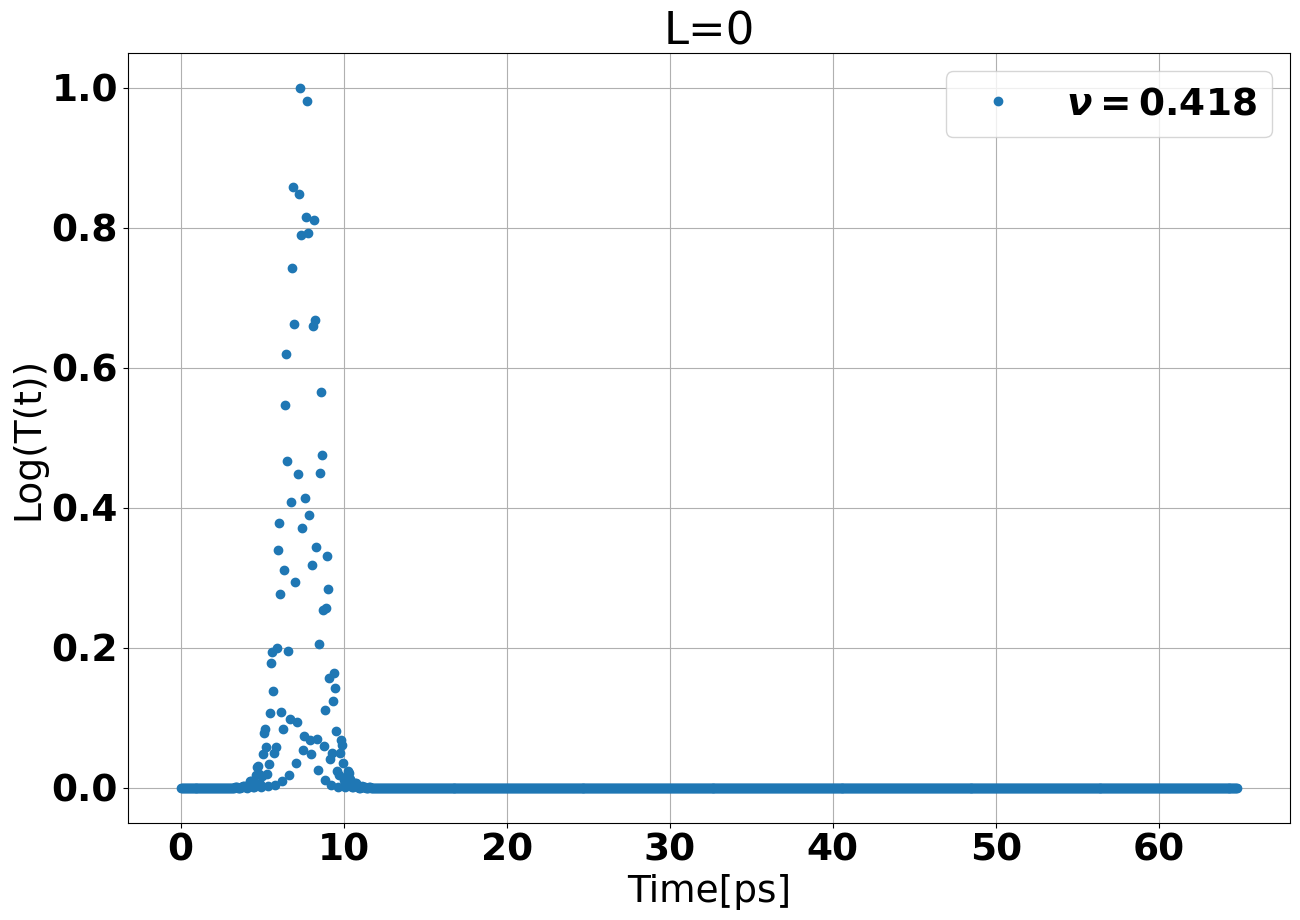

1


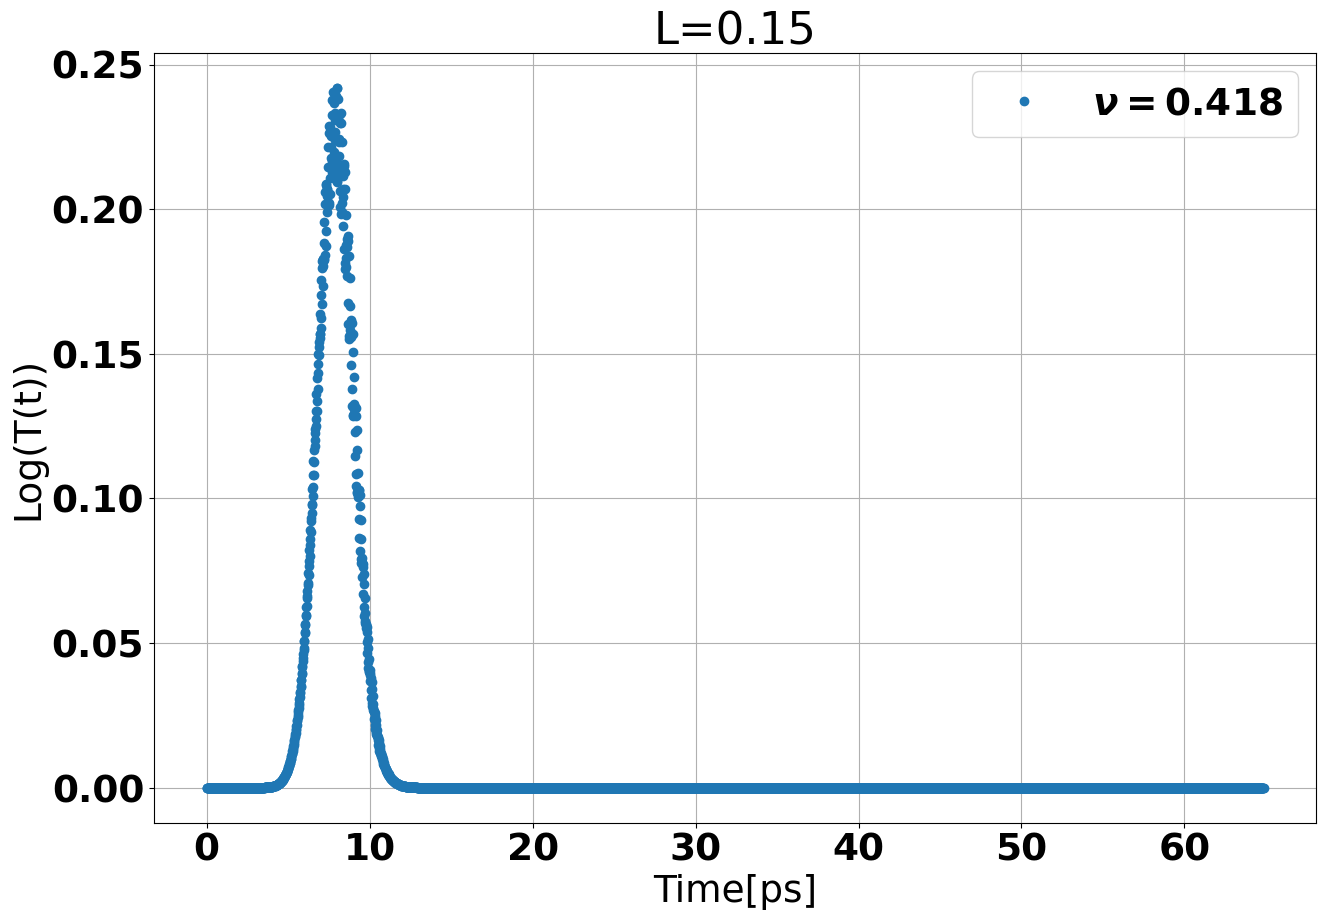

2


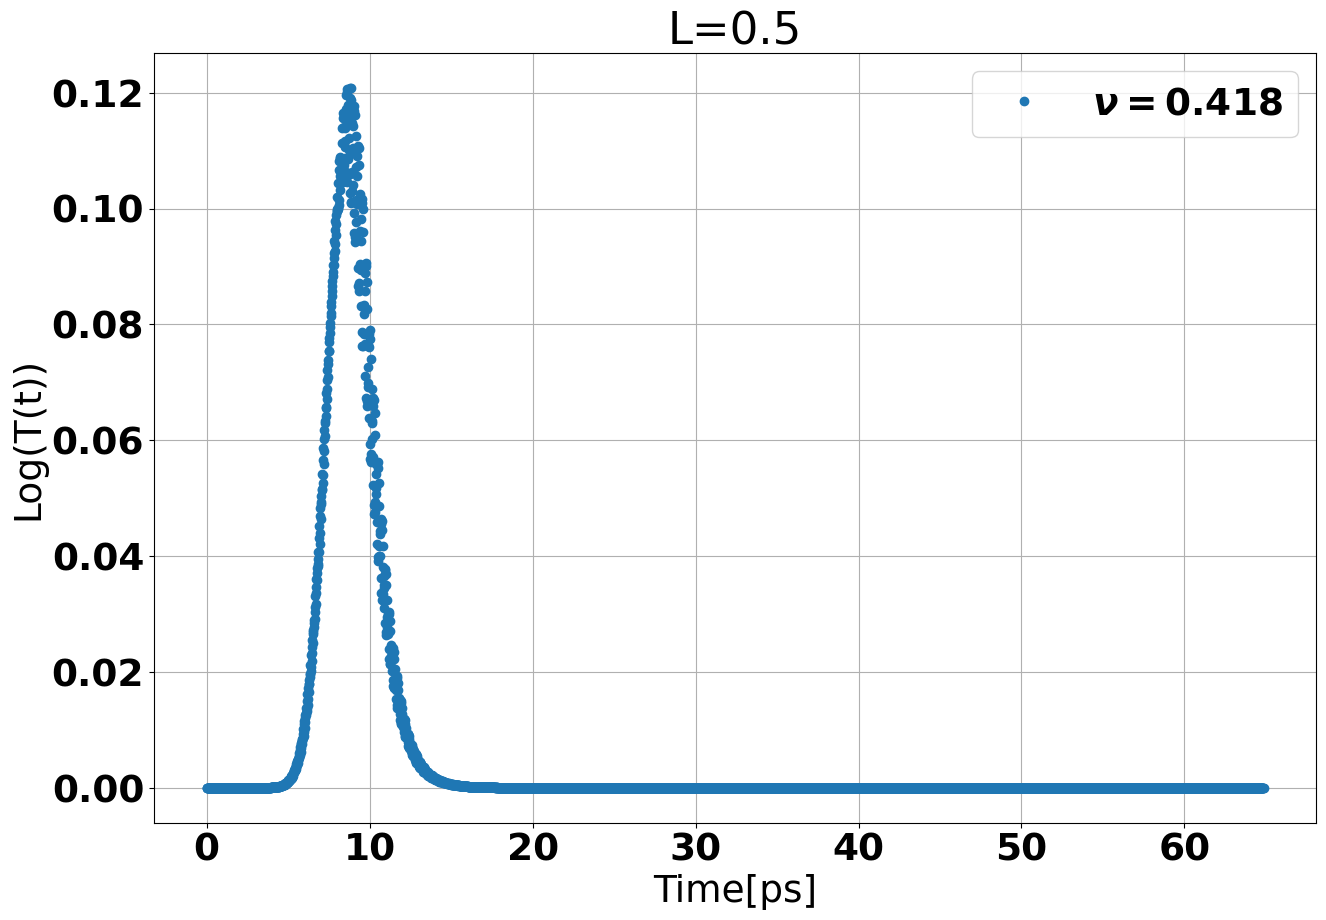

3


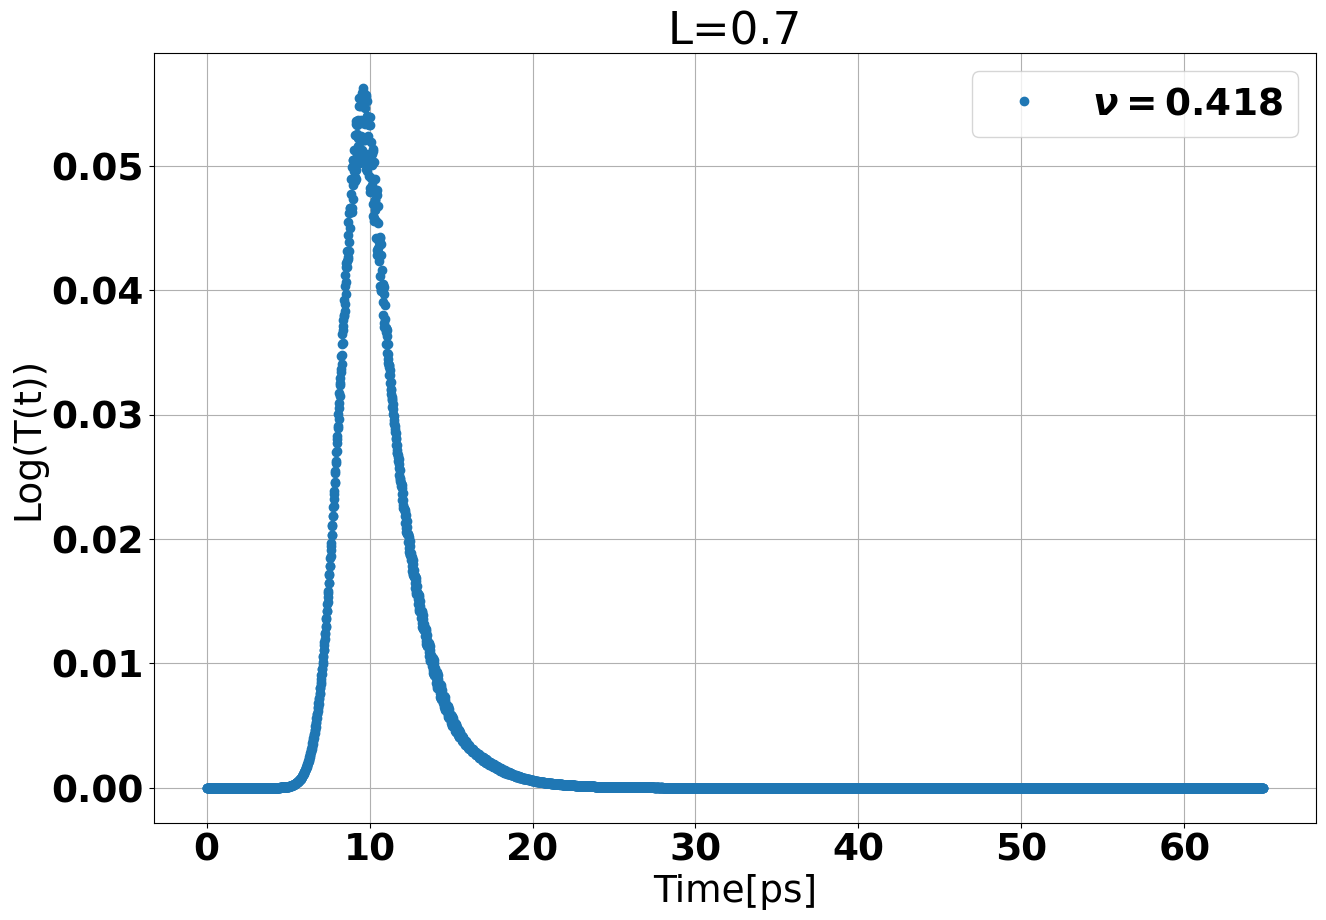

4


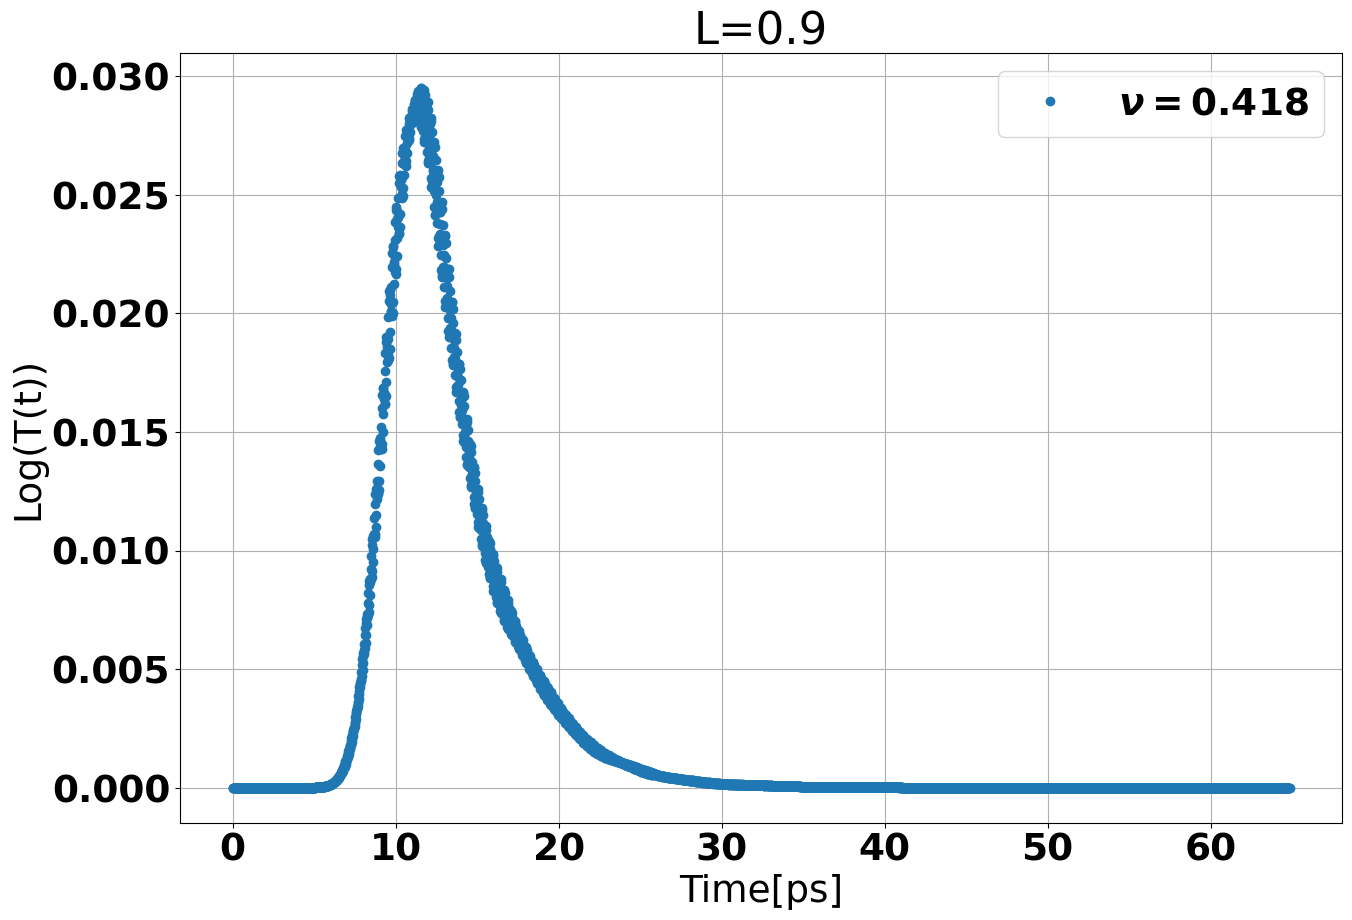

In [36]:
for i,item in enumerate(fluxes_SAL):

    max_index = fluxes_SAL[i]['max_time_index']
    plt.figure(figsize=(15, 10))
    print(i)
    plt.plot(fluxes_SAL[i]['times'][:],fluxes_SAL[i]["flux"][:],"o",label=f"$\\nu={nu}$")
    try:
        plt.plot(fluxes_Diff[i]['times'][max_index:],fluxes_Diff[i]["flux"][max_index:],"o",label=f"$\\nu={nu}$")
    except:
        False
    plt.title(f"L={slices[i]:.3g}")
    plt.ylabel("Log(T(t))")
    plt.xlabel("Time[ps]")
    plt.legend()
    plt.grid()
    plt.show()
          
               








In [37]:
#Anderson
def alpha_star(Db,xi,L):
    return (Db/xi**2)*np.exp(-L/xi)

def trans_t(t,alpha,z0,L,D,td,p=0.5,s=0.85): 
    
    # A = ((L+2*z0)**2/np.pi**2)
   

    # B = (alpha*td)**(s+1)*np.exp(-alpha*t+1)*(t*alpha)**-(p+1)
    B =(s+1)*np.log(alpha*td) + (1-alpha*td) -((p+1)*np.log(alpha*t))

    return B/np.max(B)

In [38]:
import jax
import jax.numpy as jnp
from jaxopt import ScipyMinimize
import jaxopt
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", True)

In [39]:
def diffusion(t,l,L):
    diff = np.exp(-t*Db(l)*np.pi**2/(L+2*z0)**2)
    return diff/np.max(diff)

def diff(t,A):
    B = jnp.exp(-A*t)
    return jnp.log(B/jnp.max(B))

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:1.0  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.5  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.25  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.0625  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.03125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 7 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.01562

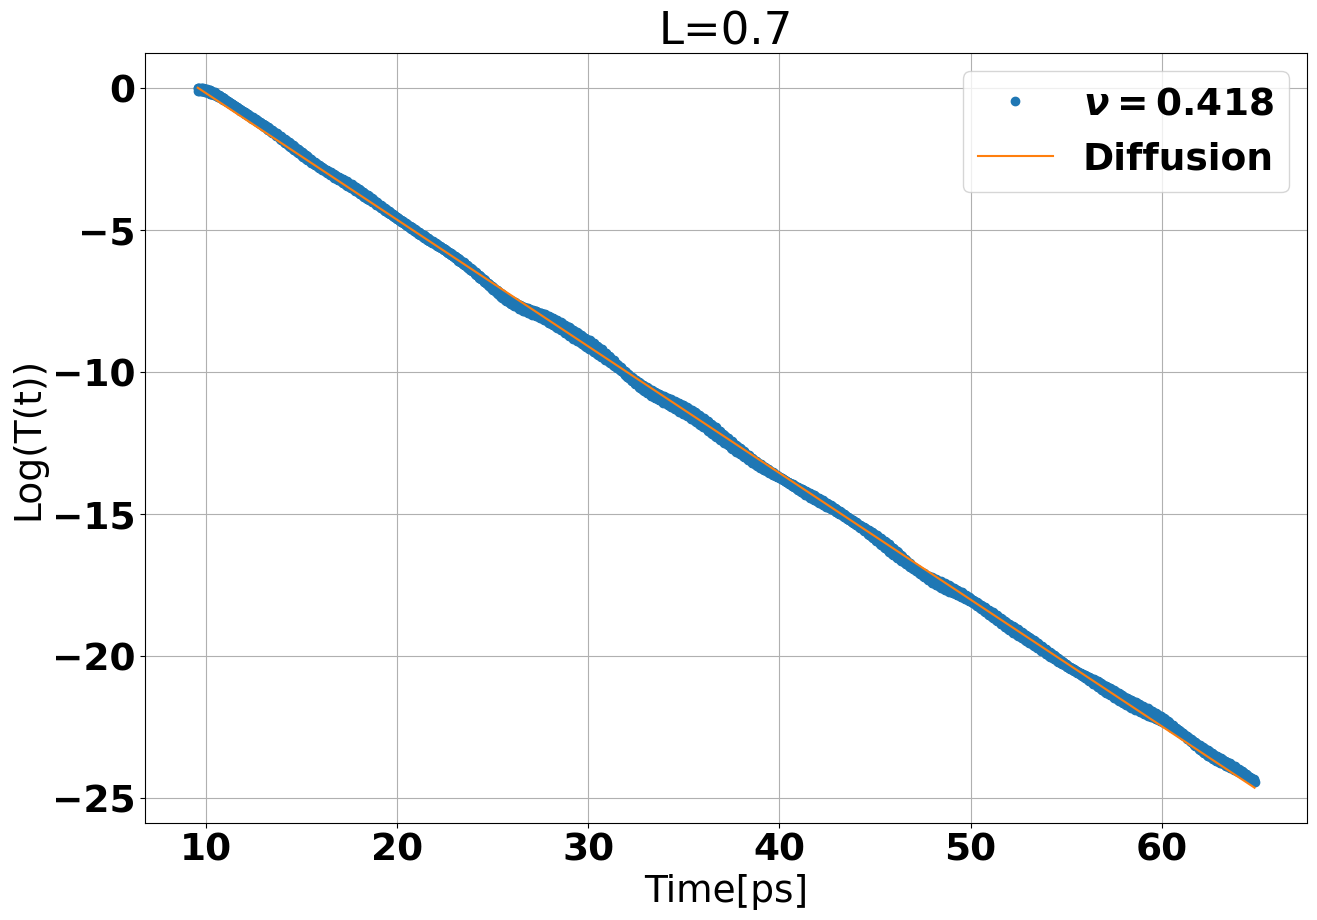

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:1.0  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.5  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.25  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.0625  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.03125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 7 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.01562

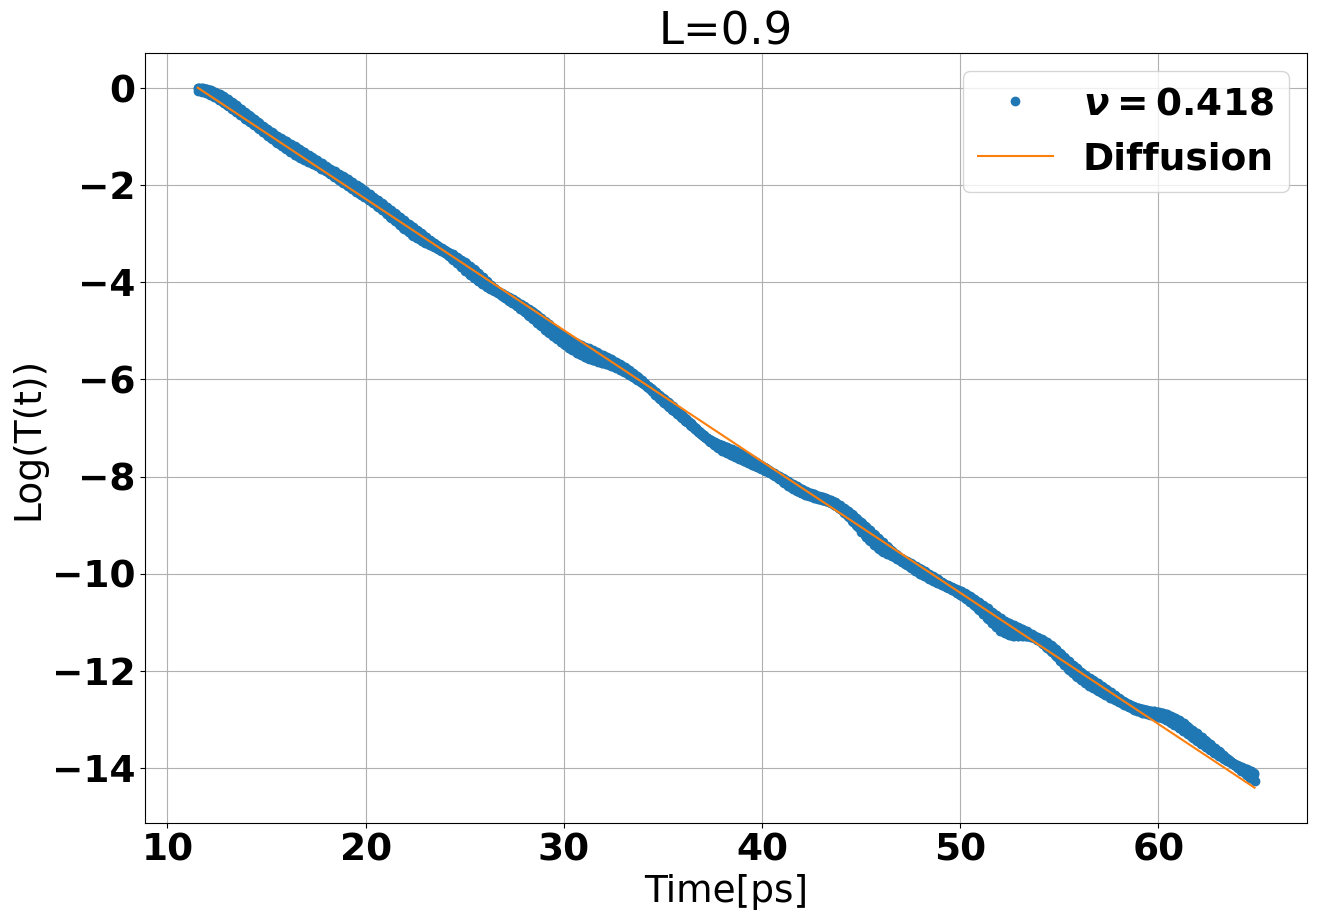

In [40]:
for i,item in enumerate(fluxes_SAL):
    if i < 3:
       continue
    max_index = fluxes_SAL[i]['max_time_index']
    plt.figure(figsize=(15, 10))
    indices = jnp.where(jnp.bool_(fluxes_SAL[i]['times']<200) & np.bool_(fluxes_SAL[i]['times']>fluxes_SAL[i]['times'][max_index]))
    plt.plot(fluxes_SAL[i]['times'][max_index:],jnp.log(fluxes_SAL[i]["flux"][max_index:]/jnp.max(fluxes_SAL[i]["flux"][max_index:])),"o",label=f"$\\nu={nu}$")
    #Theory#########################################################################
    L = 18.01*slices[i]*a
    model = lambda params,t: diff(t,params[0])
    def loss_fn(params):
     y_pred = model(params, fluxes_SAL[i]['times'][indices])
     return jnp.mean((y_pred - jnp.log(fluxes_SAL[i]["flux"][indices]/jnp.max(fluxes_SAL[i]["flux"][indices])))**2)
    
    initial_params = jnp.array([1], dtype=jnp.float32)
    optimizer = jaxopt.BFGS(fun=loss_fn,maxiter=15000)
    # Optimize the parameters
    result = optimizer.run(initial_params)
    optimal_params = result.params

    print(optimal_params)
    transmission_diffusive = diff(fluxes_SAL[i]['times'][max_index:],optimal_params[0])
    plt.plot(fluxes_SAL[i]['times'][max_index:],transmission_diffusive,label="Diffusion")
    #################################################################################    
    plt.title(f"L={slices[i]:.3g}")
    plt.ylabel("Log(T(t))")
    plt.xlabel("Time[ps]")
    plt.legend()
    plt.grid()
    plt.show()
          
               








In [41]:
def diffusion_jax(t,l,z0,L):
    diff = jnp.exp(-t*Db(l)*jnp.pi**2/(L+2*z0)**2)
    return jnp.log(diff/jnp.max(diff))

In [42]:
jax.default_backend()

'cpu'

In [43]:
#Anderson
Db = lambda l_var:3e2*l_var/3
def alpha_star(Db,xi,L):
    return (Db/xi**2)*jnp.exp(-L/xi)

def trans_t(t,alpha,td,p=0.5,s=0.85): 
    
    #B = (alpha*td)**(s+1)*jnp.exp(-alpha*t+1)*(t*alpha)**-(p+1)
    B =(s+1)*jnp.log(alpha*td) + (1-alpha*td) -(p+1)*jnp.log(alpha*t)
    return B


def trans_t_1(t,alpha,p): 
    
    #B = (alpha*td)**(s+1)*jnp.exp(-alpha*t+1)*(t*alpha)**-(p+1)
    B = -p*jnp.log(t)-alpha*t
    #B = t**(-p)*jnp.exp(-alpha*t)

    #return jnp.log(B/jnp.max(B))
    return (B)

def transmission_anderson_func_jax(t,l,nu,L,td,s,p):
    Db_calculated = Db(l)
    k =  2*jnp.pi*(nu/(a))
    xi = 6*l*(k*l)**2/(1-(k*l)**4)
    alpha= alpha_star(Db_calculated,xi,L)
    transmission = trans_t(t,alpha,td,p,s)
    return transmission
def transmission_anderson_func_jax_1(t,l,nu,L,td,s,p):
    Db_calculated = Db(l)
    k =  2*jnp.pi*(nu/(a))
    xi = 6*l*(k*l)**2/(1-(k*l)**4)
    alpha= alpha_star(Db_calculated,xi,L)
    transmission = trans_t_1(t,alpha,td,p,s)
    return transmission

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 65574984.0 Stepsize:1.0  Decrease Error:32782079.24440182  Curvature Error:65574984.0 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 32684452.0 Stepsize:0.5  Decrease Error:8168406.552199946  Curvature Error:32684452.0 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 16239185.0 Stepsize:0.25  Decrease Error:2028545.0085997304  Curvature Error:16239185.0 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 8016551.5 Stepsize:0.125  Decrease Error:500357.93742480344  Curvature Error:8016551.5 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 3905235.25 Stepsize:0.0625  Decrease Error:121700.32699363504  Curvature Error:3905235.25 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): 1849576.875 Stepsize:0.03125  

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:1.0  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.5  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.25  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 430240.59375 Stepsize:0.0625  Decrease Error:13312.786464240127  Curvature Error:430240.59375 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): 174841.28125 Stepsize:0.03125  Decrease Error:2665.779405623214  Curvature Error:174841.28125 
INFO: jaxopt.ZoomLineSearch: Iter: 7 Minimu

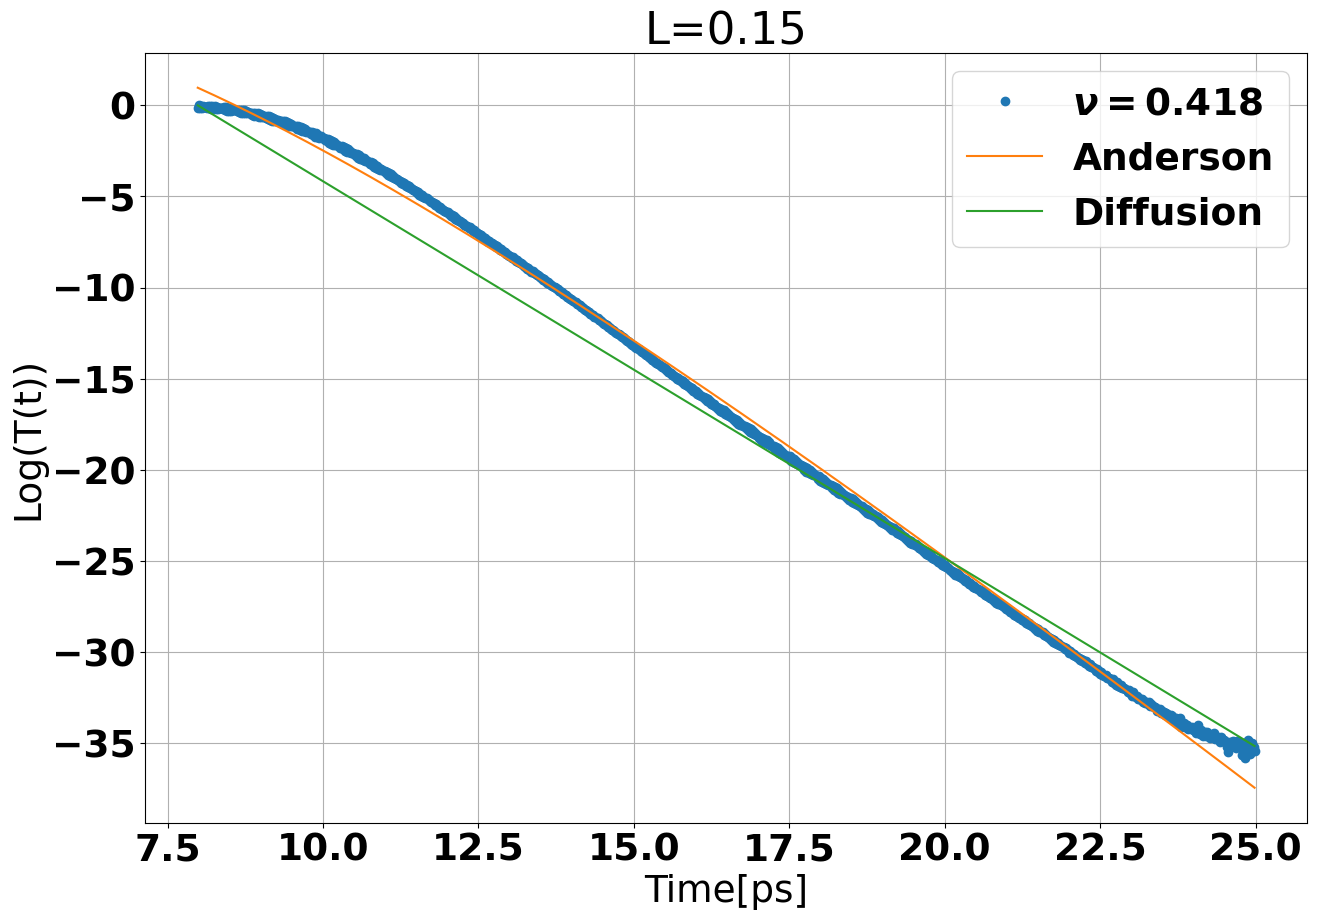

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 2742856.5 Stepsize:1.0  Decrease Error:1371210.2350786412  Curvature Error:2742856.5 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 1367277.375 Stepsize:0.5  Decrease Error:341710.3232898184  Curvature Error:1367277.375 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 679487.75 Stepsize:0.25  Decrease Error:84881.46308253547  Curvature Error:679487.75 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 335592.96875 Stepsize:0.125  Decrease Error:20947.30690067615  Curvature Error:335592.96875 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 163645.578125 Stepsize:0.0625  Decrease Error:5100.297290192042  Curvature Error:163645.578125 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): 77671.8828125 Stepsize

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 22893.935546875 Stepsize:1.0  Decrease Error:10227.353760431663  Curvature Error:22893.935546875 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 9855.755859375 Stepsize:0.5  Decrease Error:1972.5221842250749  Curvature Error:9855.755859375 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 3336.6650390625 Stepsize:0.25  Decrease Error:289.7652399933187  Curvature Error:3336.6650390625 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 77.11983489990234 Stepsize:0.125  Decrease Error:59.55147884532559  Curvature Error:77.11983489990234 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 105.2557601928711 Stepsize:0.014949911274015903  Decrease Error:0.6750455982271045  Curvature Error:105.2557601928711 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum D

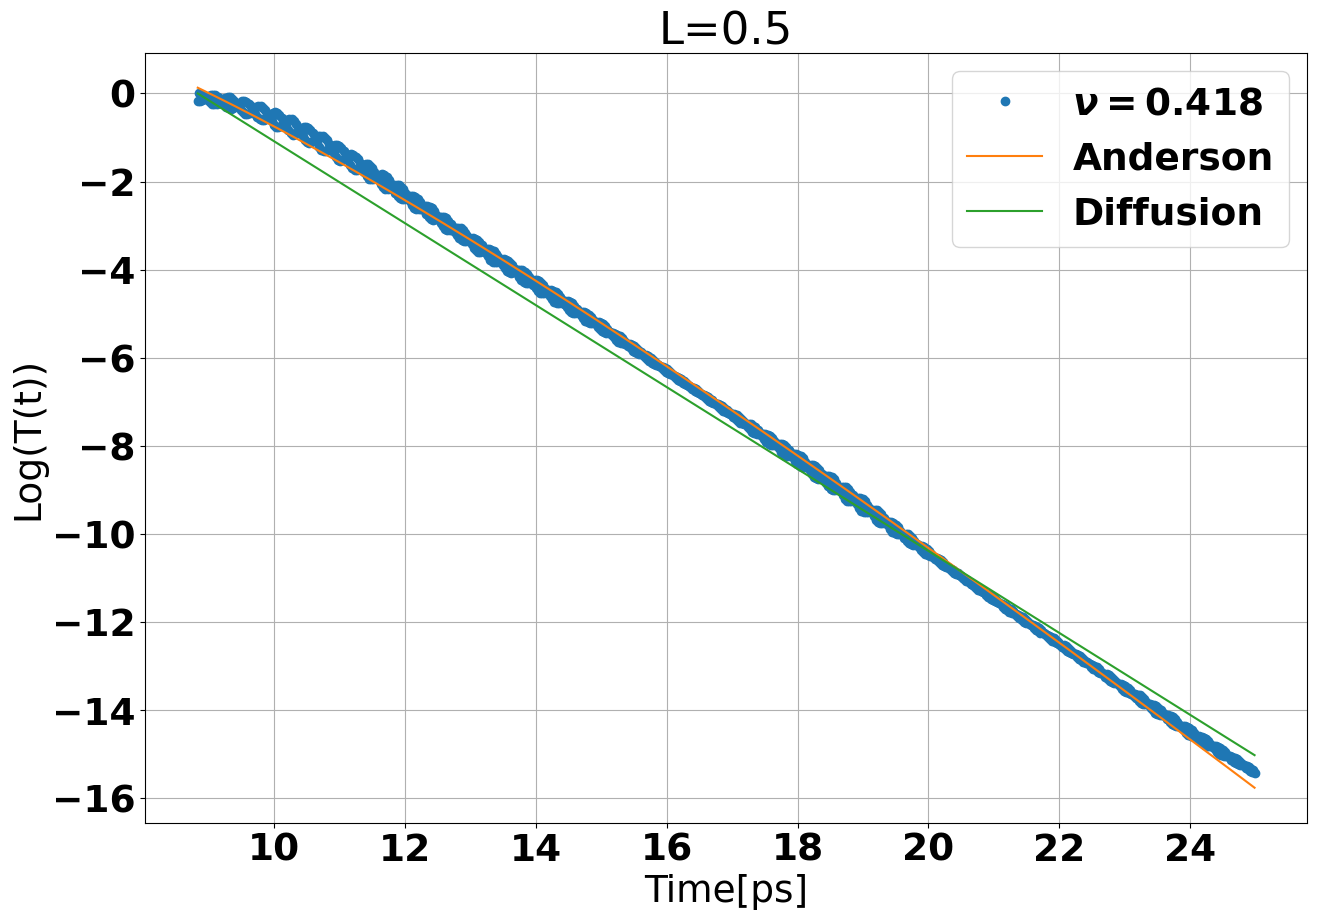

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 1345653248.0 Stepsize:1.0  Decrease Error:672806235.5413436  Curvature Error:1345653248.0 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 672439488.0 Stepsize:0.5  Decrease Error:168099694.07573166  Curvature Error:672439488.0 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 335832608.0 Stepsize:0.25  Decrease Error:41973991.114130795  Curvature Error:335832608.0 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 167529168.0 Stepsize:0.125  Decrease Error:10468031.576131642  Curvature Error:167529168.0 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 83377456.0 Stepsize:0.0625  Decrease Error:2604274.792832387  Curvature Error:83377456.0 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): 41301604.0 Stepsiz

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:1.0  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.5  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.25  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.0625  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.03125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 7 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.01562

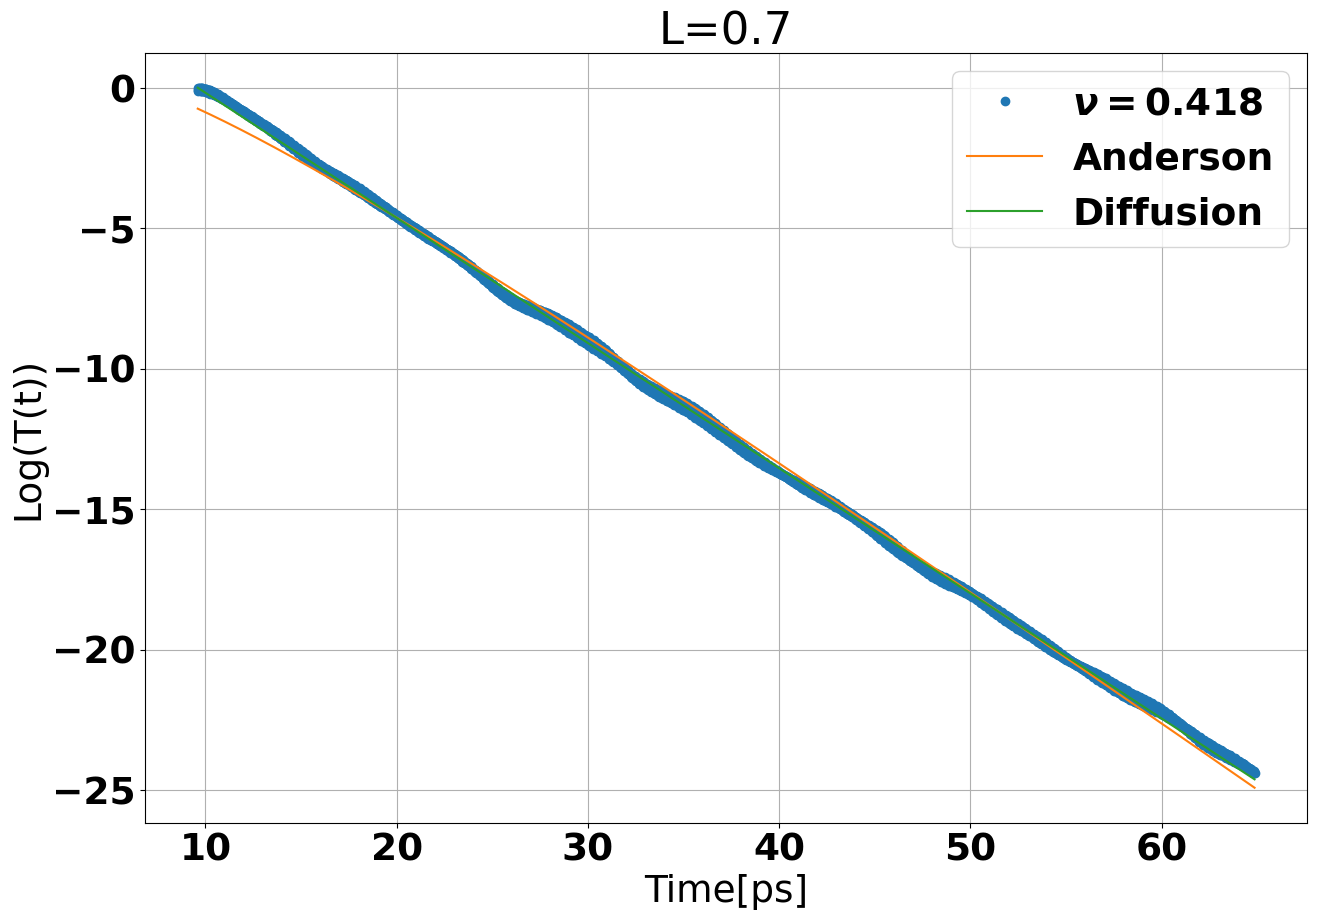

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 4628734464.0 Stepsize:1.0  Decrease Error:2314299634.1738596  Curvature Error:4628734464.0 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 2313079040.0 Stepsize:0.5  Decrease Error:578235990.527479  Curvature Error:2313079040.0 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 1155251584.0 Stepsize:0.25  Decrease Error:144389538.62387693  Curvature Error:1155251584.0 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 576337792.0 Stepsize:0.125  Decrease Error:36012655.151972845  Curvature Error:576337792.0 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 286880864.0 Stepsize:0.0625  Decrease Error:8960799.035995029  Curvature Error:286880864.0 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): 142152416.0 S

c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:1.0  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.5  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.25  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.0625  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.03125  Decrease Error:inf  Curvature Error:inf 
INFO: jaxopt.ZoomLineSearch: Iter: 7 Minimum Decrease & Curvature Errors (stop. crit.): inf Stepsize:0.01562

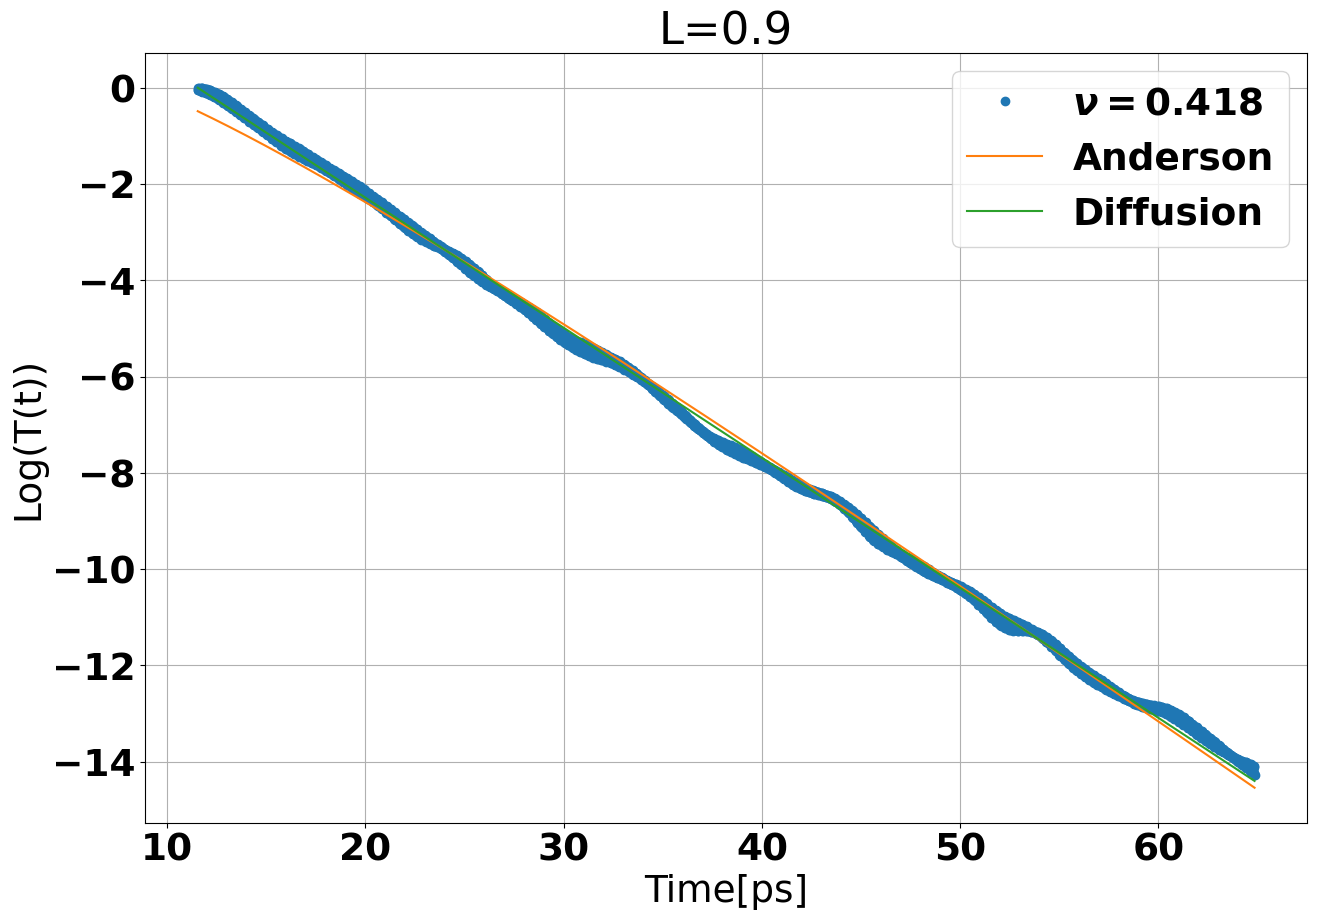

In [45]:

###########Fitting procedure###################
for i,item in enumerate(fluxes_SAL):
    #limit = 140
    if i ==0:
      continue
    if i < 3:
       limit = 25
    else: 
      limit = 200
    max_index = fluxes_SAL[i]['max_time_index']
    plt.figure(figsize=(15, 10))
    indices = jnp.where(jnp.bool_(fluxes_SAL[i]['times']<limit) & np.bool_(fluxes_SAL[i]['times']>fluxes_SAL[i]['times'][max_index]))
    plt.plot(fluxes_SAL[i]['times'][indices],jnp.log(fluxes_SAL[i]["flux"][indices]/jnp.max(fluxes_SAL[i]["flux"][indices])),"o",label=f"$\\nu={nu}$")
    #Theory Anderson#########################################################################
    L = 18.01*slices[i]*a
    model = lambda params,t: trans_t_1(t,params[0],params[1])
    def loss_fn(params):
     y_pred = model(params, fluxes_SAL[i]['times'][indices])
     return jnp.mean((y_pred - jnp.log(fluxes_SAL[i]["flux"][indices]/jnp.max(fluxes_SAL[i]["flux"][indices])))**2)
    
    initial_params = jnp.array([0.5,0.5], dtype=jnp.float32)
    optimizer = jaxopt.BFGS(fun=loss_fn,maxiter=15000)
    # Optimize the parameters
    result = optimizer.run(initial_params)
    optimal_params = result.params

    print("Anderson: ",optimal_params)
    print("Alpha Theory:",alpha_star(Db(l_adjusted),adjusted_xi,L))

    transmission_anderson = trans_t_1(fluxes_SAL[i]['times'][indices],optimal_params[0],optimal_params[1])

    plt.plot(fluxes_SAL[i]['times'][indices],transmission_anderson,label="Anderson")
    #################################################################################    
    #Theory Diffusion#########################################################################
    model = lambda params,t: diff(t,params[0])
    def loss_fn(params):
     y_pred = model(params, fluxes_SAL[i]['times'][indices])
     return jnp.mean((y_pred - jnp.log(fluxes_SAL[i]["flux"][indices]/jnp.max(fluxes_SAL[i]["flux"][indices])))**2)
    
    initial_params = jnp.array([1], dtype=jnp.float32)
    optimizer = jaxopt.BFGS(fun=loss_fn,maxiter=15000)
    # Optimize the parameters
    result = optimizer.run(initial_params)
    optimal_params = result.params

    print("Diff: ",optimal_params)
    transmission_diffusive = diff(fluxes_SAL[i]['times'][indices],optimal_params[0])
    plt.plot(fluxes_SAL[i]['times'][indices],transmission_diffusive,label="Diffusion")
    ###############################################################################
    plt.title(f"L={slices[i]:.3g}")
    plt.ylabel("Log(T(t))")
    plt.xlabel("Time[ps]")
    plt.legend()
    plt.grid()
    plt.savefig(f'{store_path}/{f"L_{slices[i]:.3g}_{nu}_res_{res}_time_{time}"}.pdf', format='pdf')
    plt.show()
          
               






